In [74]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
from scipy.special import stdtrit
from statsmodels.graphics.tsaplots import plot_acf

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/code/rundata/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/code/rundata/run_data.csv")
fontsize = 18

0.20968285842555473


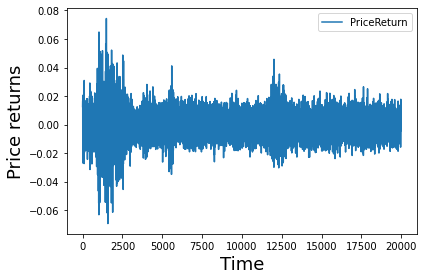

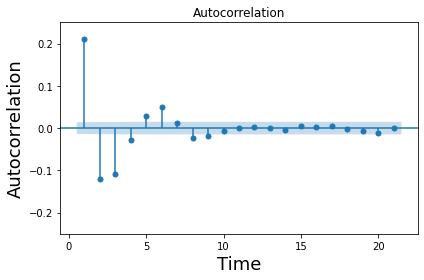

In [75]:
''' Absence of linear autocorrelations} in asset returns '''

df['PriceReturn'] = (df['Price'] - df['Price'].shift(1)) / df['Price']
print(df['PriceReturn'].autocorr())

df.plot(x="Gen", y = ["PriceReturn"],
        kind="line")
plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Price returns', fontsize=fontsize)
plt.tight_layout()
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/validation/val1a.png', dpi = 300)
plt.show()

data = pd.DataFrame()
data['Time'] = df['Gen']
data['PriceReturn'] = df['PriceReturn']
data.set_index(['Time'])
del data['Time']
data = data.apply(lambda x: pd.Series(x.dropna().values))
# print(data.isnull().sum())

plot_acf(x=data, lags = 21, zero=False, alpha=0.05)
plt.ylim(-0.25, 0.25)
plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Autocorrelation', fontsize=fontsize)
plt.tight_layout()
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/validation/val1b.png', dpi = 300)
plt.show()

PriceReturn    4.226421
dtype: float64
PriceReturn    4.226421
dtype: float64


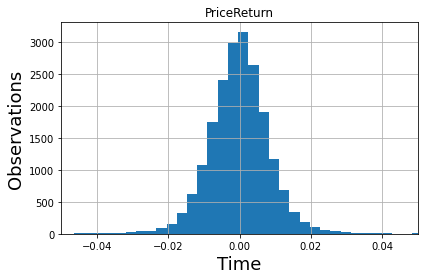

In [76]:
''' {Heavy tails distributions of returns} '''

print(data.kurt())
print(data.kurtosis())

data.hist('PriceReturn', bins = 50)
plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Observations', fontsize=fontsize)
plt.xlim(-0.05, 0.05)
plt.tight_layout()
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/validation/val2.png', dpi = 300)
plt.show()

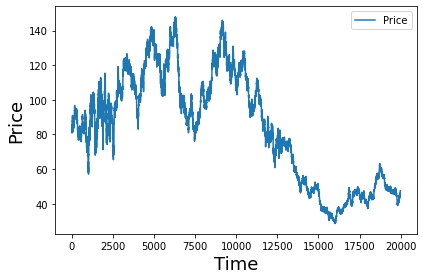

In [80]:
''' Gain loss assymetry '''

df.plot(x="Gen", y = ["Price"],
        kind="line")
plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Price', fontsize=fontsize)
plt.tight_layout()
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/validation/val3.png', dpi = 300)
plt.show()